# Project Outline

- House Price Prediction using Regression Analysis

In [5]:
#loading Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
house = pd.read_csv('Data/house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can see that it’s a large dataset, containing more than 21 thousand entries and 20 columns. All of the columns contain numeric data, which is convenient for linear regression.

Let's look at the distribution of variables in the dataset:

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

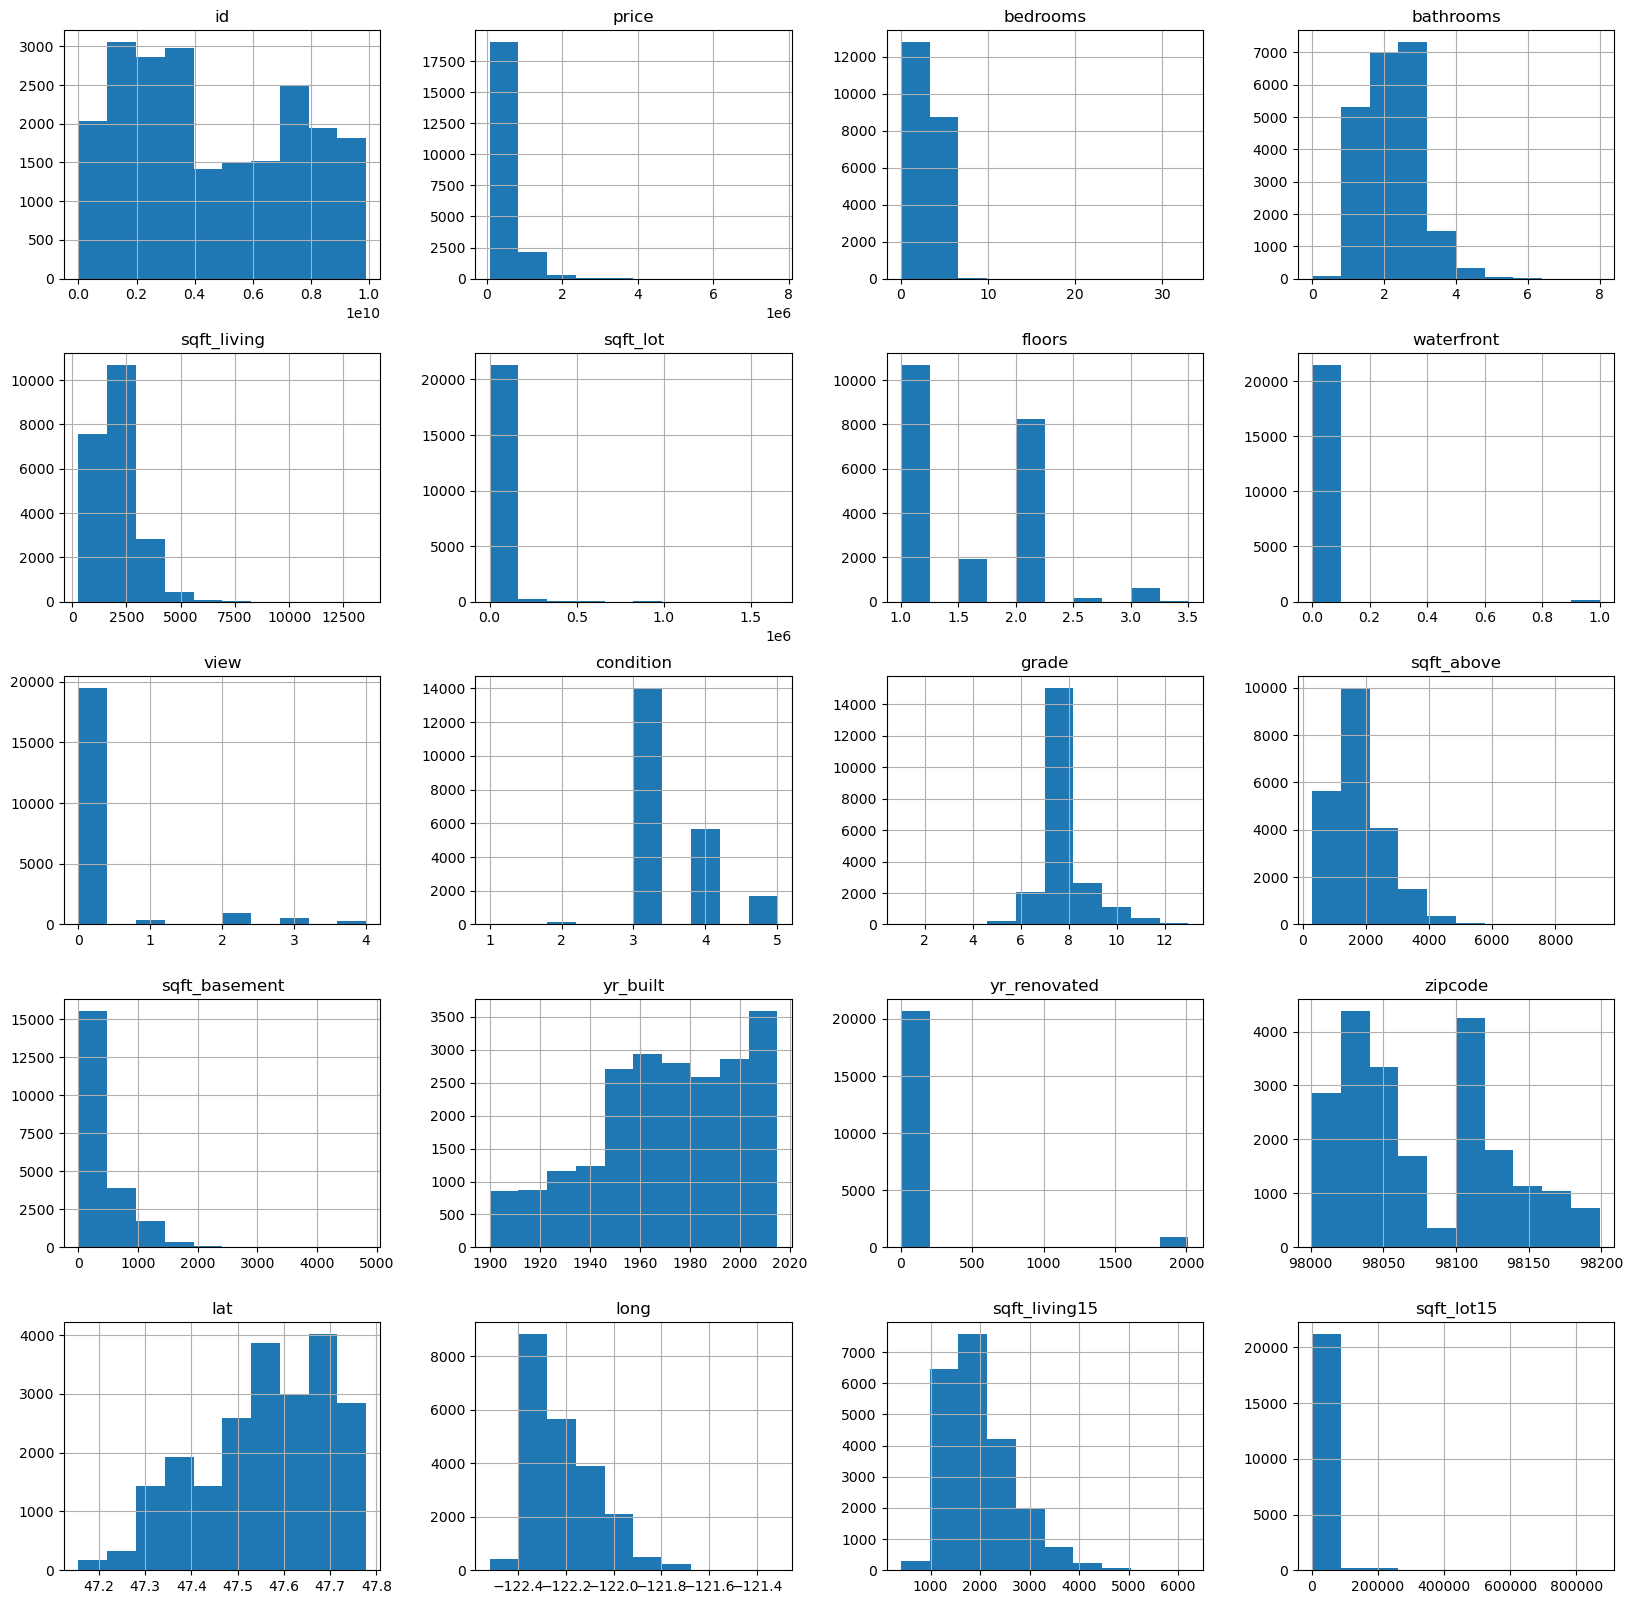

In [8]:
house.hist(figsize=(20,20))

### Data Pre-Processing

From Above Histograms, we can observe that there are lot of columns, which have 0 values more and they influence the data more. It is better to drop those columns along with unuseful columns

In [12]:
drop_columns = ['id','lat','long','zipcode','yr_renovated','waterfront']

house.drop(labels=drop_columns, inplace=True,axis=1)

In [14]:
house.drop(labels='date', inplace=True,axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,1800,7503


In [17]:
house['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [18]:
house['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [19]:
house['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

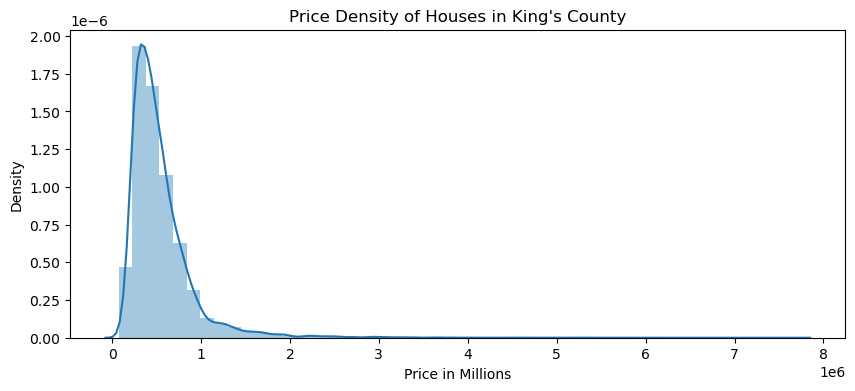

In [36]:
#lets check for skewness of price

plt.figure(figsize=(10,4))

price_dist = sns.distplot(house["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

As we can see, there is a noticeable right skew. This suggests that, on the more expensive side of houses, there's a large variety in the prices of houses.

Let's see if a logged distributed will create more symmetry and ergo more interpretability.

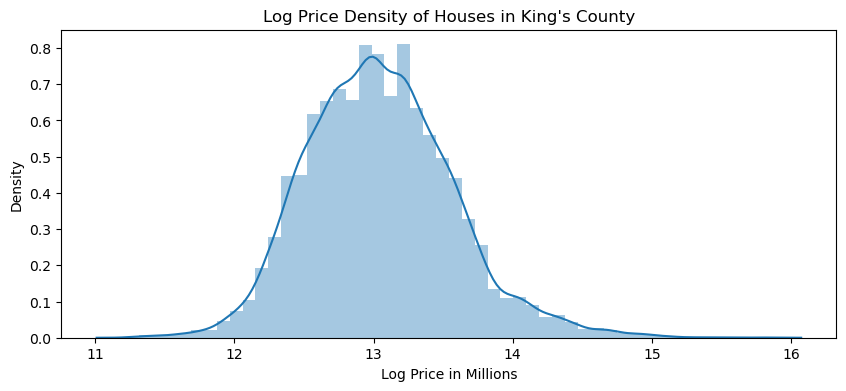

In [37]:
plt.figure(figsize=(10,4))

logged_price_dist = sns.distplot(np.log(house["price"]))
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
plt.show()

Looks good! It seems that applying a logarithm transform to the data made it more symmetric as a result.

### Co-relations and Multi-Collinearity

In [21]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

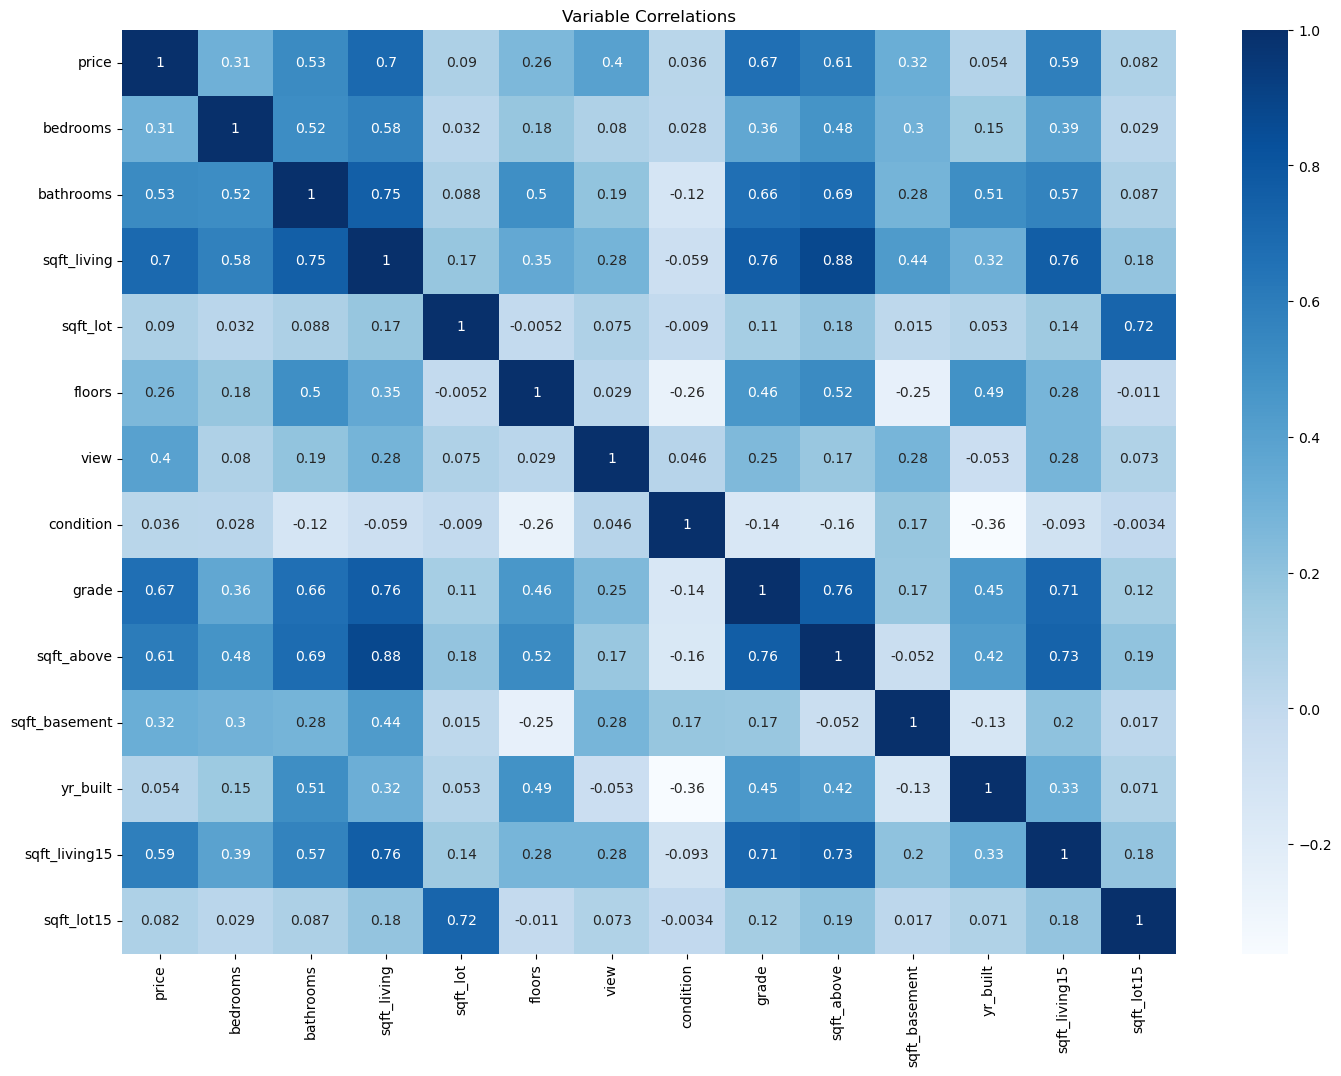

In [25]:
fig, ax=plt.subplots(figsize=(17,12))
plt.title('Variable Correlations')
sns.heatmap(house.corr(), cmap='Blues', annot=True)
plt.show()

In [27]:
corr = house.corr().abs()
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame(
    {'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [33]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], 
                                                                                          ascending=False)

In [34]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)


Correlations with Price


,Correlations,Features
2,0.702035,sqft_living
4,0.667434,grade
5,0.605567,sqft_above
7,0.585379,sqft_living15
1,0.525138,bathrooms
3,0.397293,view
6,0.323816,sqft_basement
0,0.308350,bedrooms


Multicollinear Features


,Correlations,Features
3,0.876597,"[sqft_living, sqft_above]"
7,0.876597,"[sqft_above, sqft_living]"
2,0.762704,"[sqft_living, grade]"
5,0.762704,"[grade, sqft_living]"
4,0.756420,"[sqft_living, sqft_living15]"
9,0.756420,"[sqft_living15, sqft_living]"
6,0.755923,"[grade, sqft_above]"
8,0.755923,"[sqft_above, grade]"
0,0.754665,"[bathrooms, sqft_living]"
1,0.754665,"[sqft_living, bathrooms]"


- from above we can observe, we have top 7 highley co-related features with price. This helps to consider only those variables with correlation only above 0.5
- And in Multicollinarity, we can see various number of variables which have corelarions among themselves

In [35]:
import warnings
warnings.filterwarnings('ignore')

### Feature Scaling the data

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#normalising only that data which are highy corealting with price
house[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']] = scaler.fit_transform(house[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']])
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,0.12500,0.067170,5650,1.0,0,3,0.500000,0.097588,0,1955,0.161934,5650
1,538000.0,3,0.28125,0.172075,7242,2.0,0,3,0.500000,0.206140,400,1951,0.222165,7639
2,180000.0,2,0.12500,0.036226,10000,1.0,0,3,0.416667,0.052632,0,1933,0.399415,8062
3,604000.0,4,0.37500,0.126038,5000,1.0,0,5,0.500000,0.083333,910,1965,0.165376,5000
4,510000.0,3,0.25000,0.104906,8080,1.0,0,3,0.583333,0.152412,0,1987,0.241094,7503


### Splitting our Dataset

In [44]:
from sklearn.model_selection import train_test_split
#taking corelation > o.5 from above
X=house[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']]
y=np.log(house['price'])
                                                    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [45]:
X_train.shape, X_test.shape

((17290, 5), (4323, 5))

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#fitting model on training data
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
lr.coef_

array([-0.04848322,  3.74754528,  2.25605819, -1.31879463,  0.53652152])

In [48]:
lr.intercept_

11.375457983812728

In [54]:
#predicting on the training data

y_pred=lr.predict(X_train)


r2_score = lr.score(X_train, y_train)

print('Accuracy Score for training Data: ',r2_score)

Accuracy Score for training Data:  0.5694171547731833


In [55]:
#Fitting a polynomial on the training set
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from sklearn import metrics

degree=[1,2,3]
r2_score_polydegrees=[]
rmse_polyfeatures=[]
for degrees in degree:
    est = make_pipeline(PolynomialFeatures(degree=degrees,interaction_only=True), StandardScaler(), LinearRegression())
    est.fit(X_train, y_train)
    mse = metrics.mean_squared_error(y_train, est.predict(X_train))
    rmse_polyfeatures.append(np.sqrt(metrics.mean_squared_error(y_train, est.predict(X_train))))
    r2_score_polydegrees.append(est.score(X_train,y_train))
print(r2_score_polydegrees,rmse_polyfeatures)

[0.5694171547731833, 0.5771495142463547, 0.5798389496340884] [0.3470818747763314, 0.3439513274943999, 0.34285577426361724]


We see that the r2 is highest ( r2=0.579) and the root mean square error is lowest (rmse=0.342) for third order polynomial .So lets add a polynomil of degree 3 to our linear regression model.It will include interactions between diffrent features and make our model more complex.

Not adding polynomials is prone to overfitting.I decided include regularization to reduce over fitting.

### Regularization

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
# list row sample - [‘lasso’,degree,alpha,MSE,R^2]



alphas =[0.0001,0.0005,0.001,0.005,0.1,0.5,1,1.5]
sse_tr_lasso=[]
r2_tr_lasso=[]
for alpha in alphas:
    las = make_pipeline(PolynomialFeatures(3, interaction_only=True),StandardScaler(),Lasso(alpha=alpha))
    las.fit(X_train, y_train)
    sse_tr_lasso.append(np.sqrt(mean_squared_error(y_train, las.predict(X_train))))
    r2_tr_lasso.append(las.score(X_train,y_train))
print(sse_tr_lasso,r2_tr_lasso)

[0.34316286904474586, 0.34439348279809656, 0.34511824408131236, 0.34718036253191875, 0.36841734645052854, 0.528936543728039, 0.528936543728039, 0.528936543728039] [0.5790859388287661, 0.5760616524256994, 0.5742754548483333, 0.5691727562158642, 0.5148533975673693, 0.0, 0.0, 0.0]


We see that the r2 is highest ( r2=0.579) and the root mean square error is lowest (rmse=0.343) for alpha=0.0001 and plonomial degree=3 .So lets select a lasso model with alpha=0.0001

The root mean square error for the training and the test sets are low and almost the same (rmse_test=0.343,rmse_training=0.342).So there is no over fitting or underfitting.Adding a polynomial of degree 3 and regularizing the model with Lasso regularization controlled for underfitting and over fitting.

### Testing the Fitted Model

Text(0.5, 0, 'Predicted Y')

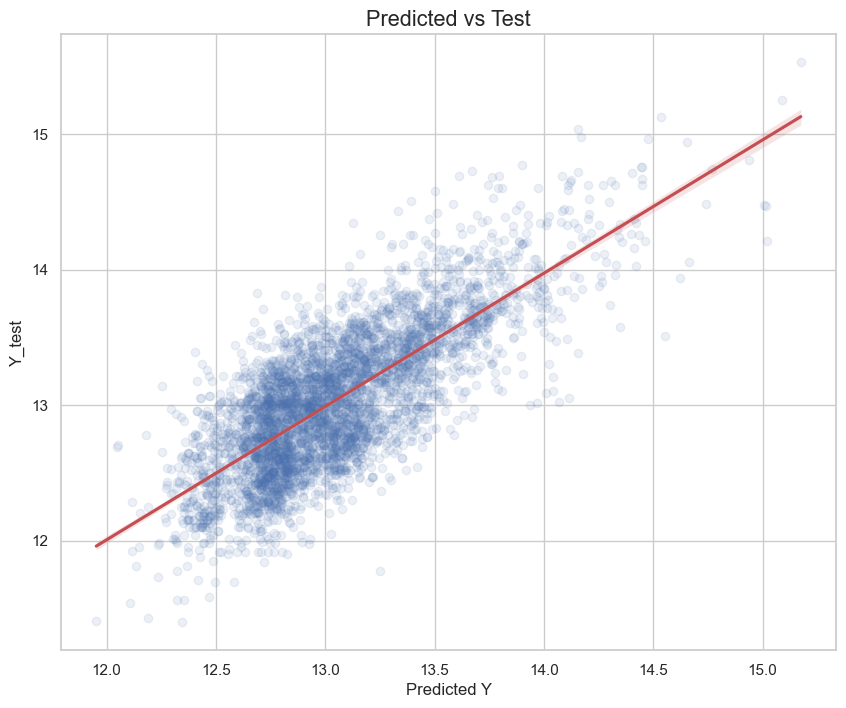

In [59]:
#Regression plot for residuals

test_pred=est.predict(X_test)
residuals_test=y_test-test_pred

plt.figure(figsize=(10,8))

sns.set(style="whitegrid")

sns.regplot(test_pred,y_test,scatter_kws={'color':'b','alpha':0.1},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y_test')
plt.xlabel('Predicted Y')

The regression plot shows that there’s a strong correlation between the model’s predictions and its actual results.

### Distribution of Results

Text(0.5, 1.0, 'Normal Q-Q plot')

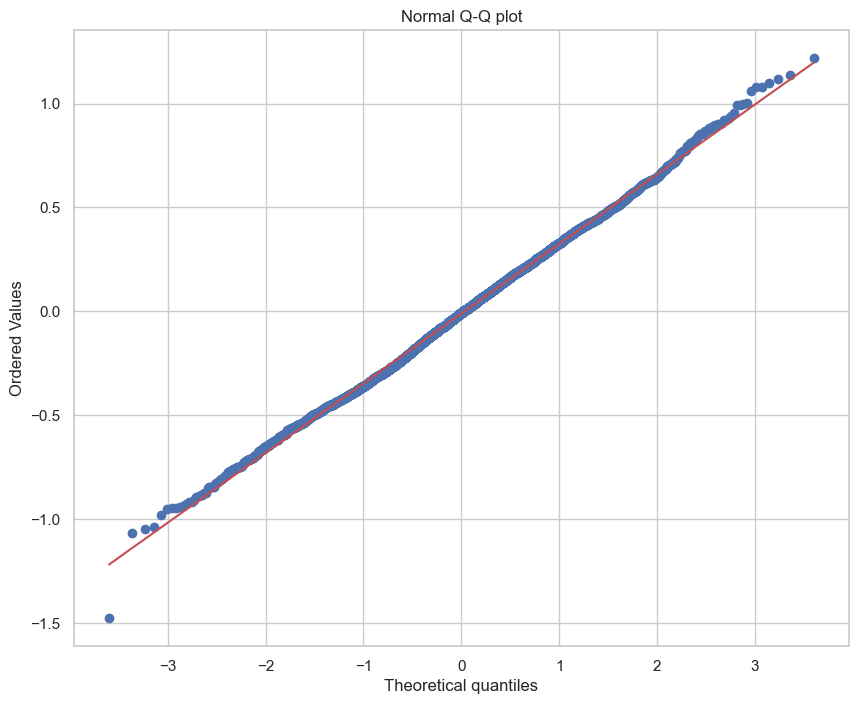

In [63]:
#Normal Q-Q plot
from scipy import stats
sns.set(style="whitegrid")


plt.figure(figsize=(10,8))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Here , data points follow the line, it indicates normal distribution. Let us confirm with Distplot

Text(0.5, 1.0, 'Distribution of Residuals')

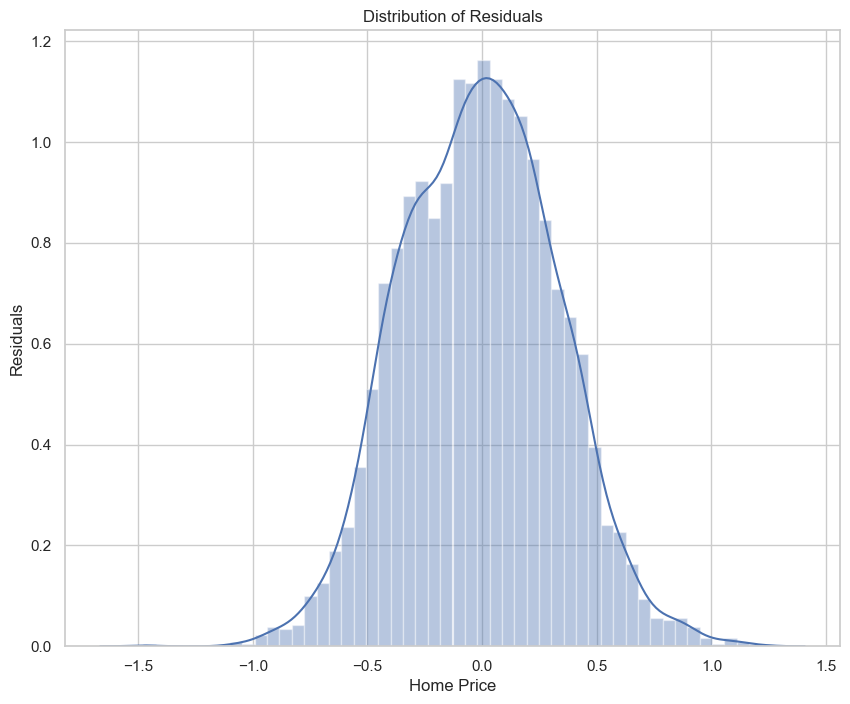

In [64]:
sns.set(style="whitegrid")


plt.figure(figsize=(10,8))
sns.distplot(residuals_test, bins=50, kde=True)
plt.xlabel('Home Price')
plt.ylabel('Residuals')
plt.title("Distribution of Residuals")

The residuals follow a normal distribution fulfilling the assumptions of a linear regression.

### Conclusion:

In my test dataset, 57.9% of the predictions for home prices can be explained by my model.